<a href="https://colab.research.google.com/github/triggereddown/Topic_Modelling/blob/main/TopicModellingCurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

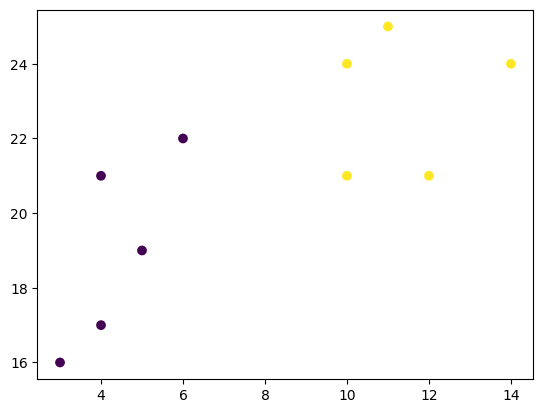

In [ ]:
/import matplotlib.pyplot as plt

x = [185,170,168,179,182,188]
y = [72,56,60,68,72,77]


from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)


kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

#Kmeans


#Modified Kmeans


Write Kmeans clustering algorithm and impleent the same using python


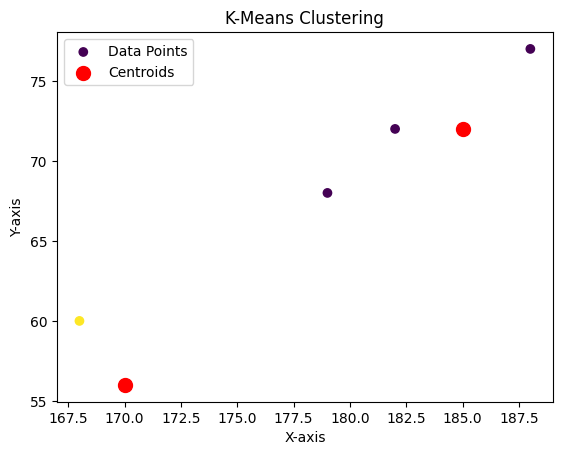

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


x = [185, 170, 168, 179, 182, 188]
y = [72, 56, 60, 68, 72, 77]


data = list(zip(x, y))


initial_centroids = [(185, 72), (170, 56)]


kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1)
kmeans.fit(data)


plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', label='Data Points')
plt.scatter(*zip(*initial_centroids), color='red', s=100, label='Centroids')  # Marking centroids as red
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("K-Means Clustering")
plt.show()


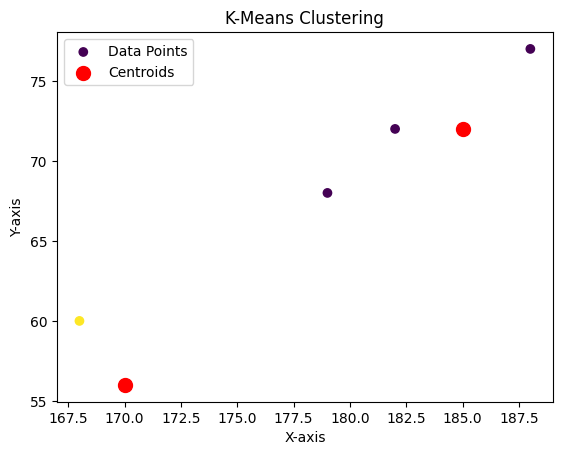

Sample Number	Data Point	Cluster Label
1		(185, 72)		c1
2		(170, 56)		c2
3		(168, 60)		c2
4		(179, 68)		c1
5		(182, 72)		c1
6		(188, 77)		c1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

samples = [1, 2, 3, 4, 5, 6]
x = [185, 170, 168, 179, 182, 188]
y = [72, 56, 60, 68, 72, 77]
classes = ['c1', 'c2', 'c2', 'c1', 'c1', 'c1']

data = list(zip(x, y))

# Defining the initial centroids for c1 and c2
initial_centroids = [(185, 72), (170, 56)]

# fitting the KMeans model with 2 clusters and predefined initial centroids
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1)
kmeans.fit(data)

# Plotting the data points and the cluster centroids
plt.scatter(x, y, c=kmeans.labels_, cmap='viridis', label='Data Points')
plt.scatter(*zip(*initial_centroids), color='red', s=100, label='Centroids')  # Mark centroids as red dots
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("K-Means Clustering")
plt.legend()
plt.show()

# Output shown  cluster labels for verification
print("Sample Number\tData Point\tCluster Label")
for i, point in enumerate(data):
    print(f"{samples[i]}\t\t{point}\t\t{'c1' if kmeans.labels_[i] == 0 else 'c2'}")


#Topic Modelling

In [ ]:
# Install necessary libraries
!pip install scikit-learn nltk

# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Sample dataset: List of documents
documents = [
   "Apple is known for its innovative phones.",
    "Samsung Galaxy is a popular Android phone.",
    "Microsoft's Lumia was a Windows phone.",
    "Google Pixel offers a great Android experience.",
    "iOS is the operating system used by Apple devices."
]

# Preprocessing function
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return " ".join(tokens)

# Preprocess all documents
processed_docs = [preprocess(doc) for doc in documents]

# Vectorize the documents
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_docs)

# Train the LDA model
num_topics = 2  # Number of topics to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Display the topics
print("Extracted Topics:")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Extracted Topics:
Topic 1:
['galaxy', 'popular', 'samsung', 'offers', 'google', 'pixel', 'experience', 'great', 'phone', 'android']
Topic 2:
['windows', 'phones', 'innovative', 'known', 'system', 'used', 'operating', 'devices', 'ios', 'apple']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Install necessary libraries
!pip install scikit-learn nltk

# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Sample dataset: List of documents
documents = [
   "Apple makes secure phones",
   "Samsung makes durable phones"
]

# Preprocessing function
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

    return " ".join(tokens)

# Preprocess all documents
processed_docs = [preprocess(doc) for doc in documents]

# Vectorize the documents
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_docs)

# Train the LDA model
num_topics = 2  # Number of topics to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Display the topics
print("Extracted Topics:")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

New One

In [ ]:
# Install necessary libraries
!pip install scikit-learn nltk

# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample dataset: List of documents
documents = [
    "Apple is known for its innovative phones.",
    "Samsung Galaxy is a popular Android phone.",
    "Microsoft's Lumia was a Windows phone.",
    "Google Pixel offers a great Android experience.",
    "iOS is the operating system used by Apple devices.",
    "Android dominates the global smartphone market.",
    "Windows Phone failed to gain significant market share."
]

# Preprocessing function
def preprocess(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    custom_stopwords = {"phone", "great", "used", "popular", "experience"}  # Add custom stopwords
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in custom_stopwords]

    return " ".join(tokens)

# Preprocess all documents
processed_docs = [preprocess(doc) for doc in documents]

# Vectorize the documents using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_docs)

# Train the LDA model
num_topics = 3  # Number of topics to extract
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(X)

# Display the topics
print("Extracted Topics:")
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx + 1}:")
    top_words = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-3:]]  # Top 3 words per topic
    print(top_words)

Extracted Topics:
Topic 1:
['microsoft', 'lumia', 'windows']
Topic 2:
['known', 'innovative', 'apple']
Topic 3:
['samsung', 'galaxy', 'android']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
{"nbformat":4,"nbformat_minor":0,"metadata":{"colab":{"provenance":[],"authorship_tag":"ABX9TyPN68H0YzRJKThGpCOpOy4A"},"kernelspec":{"name":"python3","display_name":"Python 3"},"language_info":{"name":"python"}},"cells":[{"cell_type":"code","execution_count":1,"metadata":{"colab":{"base_uri":"https://localhost:8080/","height":383},"id":"e-AEwdC6ETIk","executionInfo":{"status":"error","timestamp":1746861842524,"user_tz":-330,"elapsed":15213,"user":{"displayName":"Toufique Gazi","userId":"00771951823096633515"}},"outputId":"398da44e-89d8-455f-e754-5f9dccfe5611"},"outputs":[{"output_type":"error","ename":"ModuleNotFoundError","evalue":"No module named 'gensim'","traceback":["\u001b[0;31m---------------------------------------------------------------------------\u001b[0m","\u001b[0;31mModuleNotFoundError\u001b[0m                       Traceback (most recent call last)","\u001b[0;32m<ipython-input-1-e9f294099dca>\u001b[0m in \u001b[0;36m<cell line: 0>\u001b[0;34m()\u001b[0m\n\u001b[1;32m      3\u001b[0m \u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      4\u001b[0m \u001b[0;32mimport\u001b[0m \u001b[0mspacy\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0;32m----> 5\u001b[0;31m \u001b[0;32mfrom\u001b[0m \u001b[0mgensim\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mcorpora\u001b[0m \u001b[0;32mimport\u001b[0m \u001b[0mDictionary\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[0m\u001b[1;32m      6\u001b[0m \u001b[0;32mfrom\u001b[0m \u001b[0mgensim\u001b[0m\u001b[0;34m.\u001b[0m\u001b[0mmodels\u001b[0m \u001b[0;32mimport\u001b[0m \u001b[0mLdaModel\u001b[0m\u001b[0;34m,\u001b[0m \u001b[0mCoherenceModel\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n\u001b[1;32m      7\u001b[0m \u001b[0;32mfrom\u001b[0m \u001b[0mwordcloud\u001b[0m \u001b[0;32mimport\u001b[0m \u001b[0mWordCloud\u001b[0m\u001b[0;34m\u001b[0m\u001b[0;34m\u001b[0m\u001b[0m\n","\u001b[0;31mModuleNotFoundError\u001b[0m: No module named 'gensim'","","\u001b[0;31m---------------------------------------------------------------------------\u001b[0;32m\nNOTE: If your import is failing due to a missing package, you can\nmanually install dependencies using either !pip or !apt.\n\nTo view examples of installing some common dependencies, click the\n\"Open Examples\" button below.\n\u001b[0;31m---------------------------------------------------------------------------\u001b[0m\n"],"errorDetails":{"actions":[{"action":"open_url","actionText":"Open Examples","url":"/notebooks/snippets/importing_libraries.ipynb"}]}}],"source":["import pandas as pd\n","import matplotlib.pyplot as plt\n","\n","import spacy\n","from gensim.corpora import Dictionary\n","from gensim.models import LdaModel, CoherenceModel\n","from wordcloud import WordCloud\n","\n","# Load spaCy's English language model\n","nlp = spacy.load('en_core_web_sm')\n","\n","# Load dataset\n","df = pd.read_csv(r\"/kaggle/input/abcnews/abcnews-date-text.csv\")\n","data = df.sample(n=100000, axis=0)  # Select only 100,000 rows for the dataset\n","\n","data = data['headline_text']  # Extract the 'headline_text' column\n","\n","# Function to preprocess text using spaCy\n","def preprocess(text):\n","    doc = nlp(text.lower())\n","    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]\n","    return tokens\n","\n","# Applying the function to the dataset\n","data = data.apply(preprocess)\n","\n","# Create a dictionary from the preprocessed data\n","dictionary = Dictionary(data)\n","\n","# Filter out words that appear in fewer than 5 documents or more than 50% of the documents\n","dictionary.filter_extremes(no_below=5, no_above=0.5)\n","\n","bow_corpus = [dictionary.doc2bow(text) for text in data]\n","\n","# Train the LDA model\n","num_topics = 5\n","ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')\n","\n","# Calculate coherence score\n","coherence_model_lda = CoherenceModel(model=ldamodel, texts=data, dictionary=dictionary, coherence='c_v')\n","coherence_score = coherence_model_lda.get_coherence()\n","\n","# Plotting a wordcloud of the topics with words and probabilities\n","for topic_id, topic in enumerate(ldamodel.show_topics(num_topics=num_topics, num_words=10, formatted=False)):\n","    topic_words_probs = [(word, prob) for word, prob in topic[1]]\n","    topic_words = \" \".join([word for word, _ in topic_words_probs])\n","\n","    # Generate word cloud with specified size\n","    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)\n","\n","    # Create a figure with subplots\n","    fig, ax = plt.subplots(figsize=(8, 10))\n","\n","    # Print topic id and words with probabilities\n","    text = f\"Topic {topic_id + 1}\\n\" + \"\\n\".join([f\"{word} ({prob:.4f})\" for word, prob in topic_words_probs])\n","    fig.text(0.1, 0.95, text, fontsize=12, ha='left', va='top', wrap=True)\n","\n","    # Display the word cloud\n","    ax.imshow(wordcloud, interpolation=\"bilinear\")\n","    ax.axis(\"off\")\n","\n","    # Adjust the layout so there's enough space for the text\n","    plt.subplots_adjust(top=0.7)\n","\n","    # Display the coherence score\n","    coherence_text = f\"Coherence Score: {coherence_score:.4f}\"\n","    plt.figtext(0.5, 0.02, coherence_text, wrap=True, horizontalalignment='center', fontsize=12)\n","\n","    plt.show()"]},{"cell_type":"code","source":[],"metadata":{"id":"V2yeBZGjE757"},"execution_count":null,"outputs":[]}]}

In [1]:
!pip install gensim wordcloud spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 440.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
  Att

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


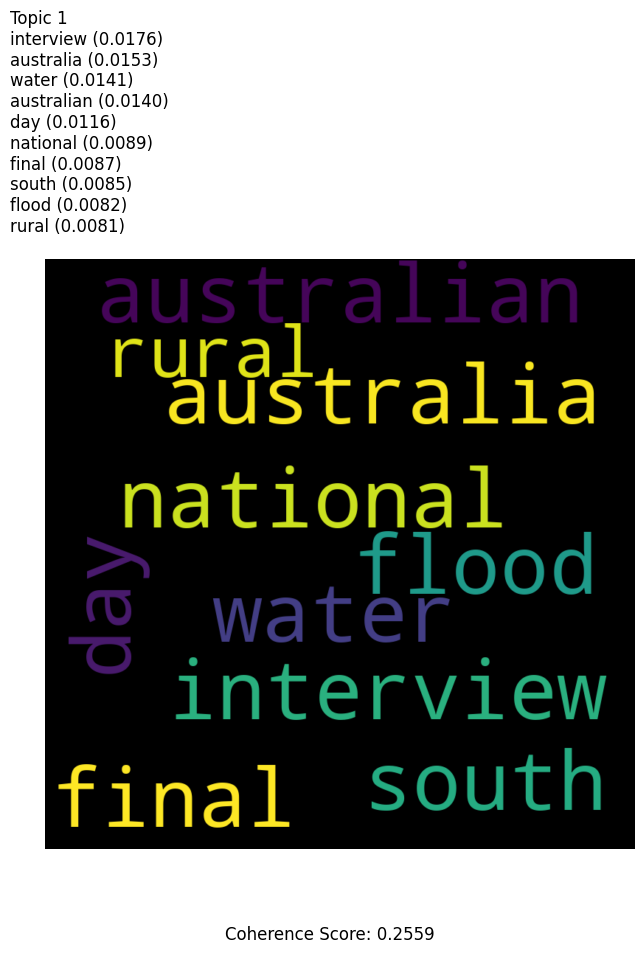

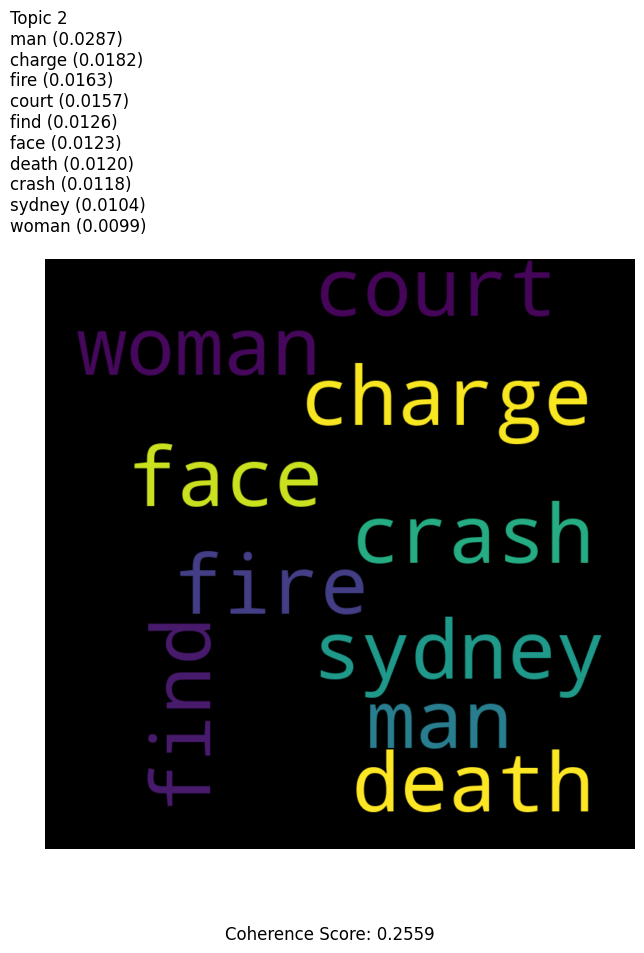

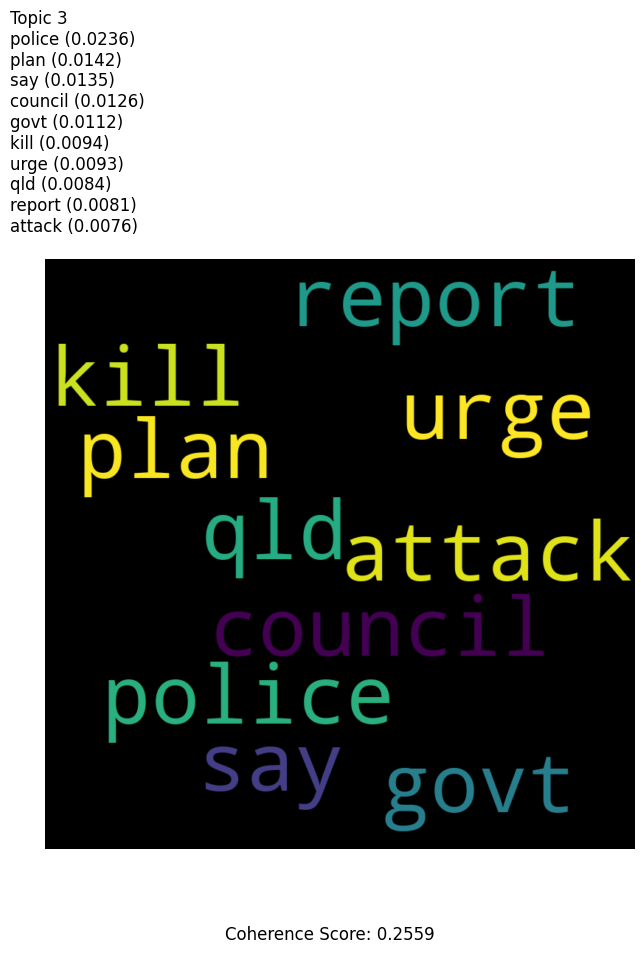

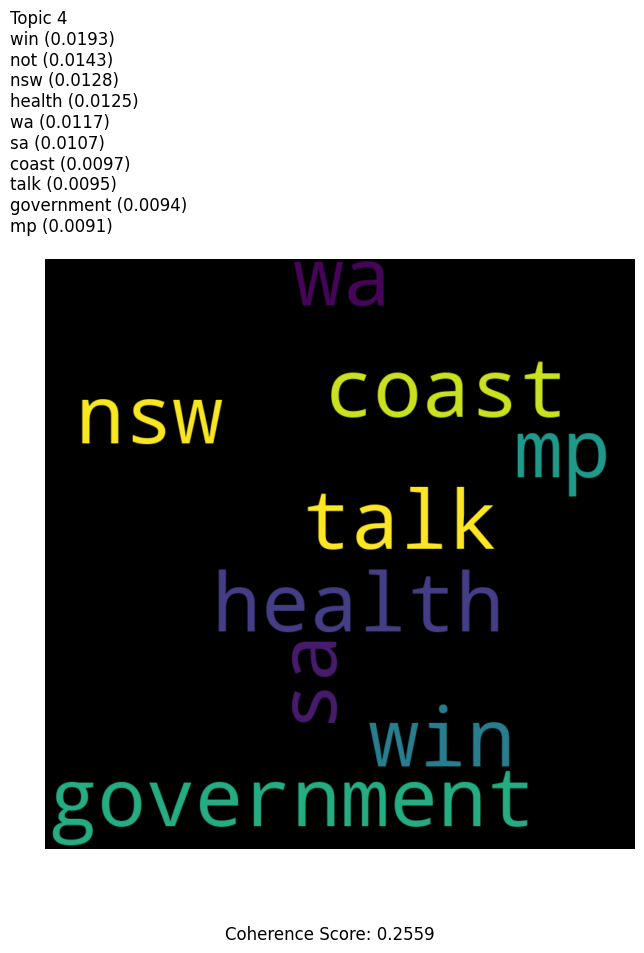

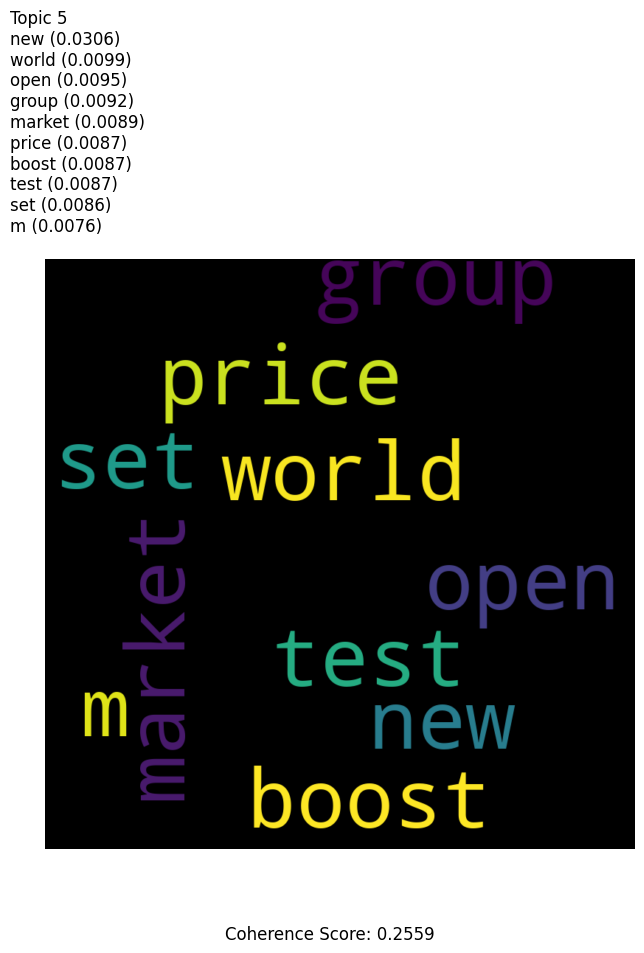

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from wordcloud import WordCloud

# Load spaCy's English language model
nlp = spacy.load('en_core_web_sm')

# Load dataset with warning suppression and bad line skipping
df = pd.read_csv("news-data.csv", on_bad_lines='skip', dtype={'headline_text': str})

# Drop missing or non-string values
df = df.dropna(subset=['headline_text'])
df = df[df['headline_text'].apply(lambda x: isinstance(x, str))]

# Sample 100,000 rows
data = df.sample(n=100000, axis=0)['headline_text']

# Preprocess function
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Apply preprocessing
data = data.apply(preprocess)

# Create dictionary and corpus
dictionary = Dictionary(data)
dictionary.filter_extremes(no_below=5, no_above=0.5)
bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Coherence score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

# WordCloud visualization
for topic_id, topic in enumerate(ldamodel.show_topics(num_topics=num_topics, num_words=10, formatted=False)):
    topic_words_probs = [(word, prob) for word, prob in topic[1]]
    topic_words = " ".join([word for word, _ in topic_words_probs])

    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)

    fig, ax = plt.subplots(figsize=(8, 10))
    text = f"Topic {topic_id + 1}\n" + "\n".join([f"{word} ({prob:.4f})" for word, prob in topic_words_probs])
    fig.text(0.1, 0.95, text, fontsize=12, ha='left', va='top', wrap=True)

    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    plt.subplots_adjust(top=0.7)

    plt.figtext(0.5, 0.02, f"Coherence Score: {coherence_score:.4f}", wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()


#ACO code



Iteration 0, Best Length: 3.0424
Iteration 10, Best Length: 2.9031
Iteration 20, Best Length: 2.9031
Iteration 30, Best Length: 2.9031
Iteration 40, Best Length: 2.9031
Iteration 50, Best Length: 2.9031
Iteration 60, Best Length: 2.9031
Iteration 70, Best Length: 2.9031
Iteration 80, Best Length: 2.9031
Iteration 90, Best Length: 2.9031


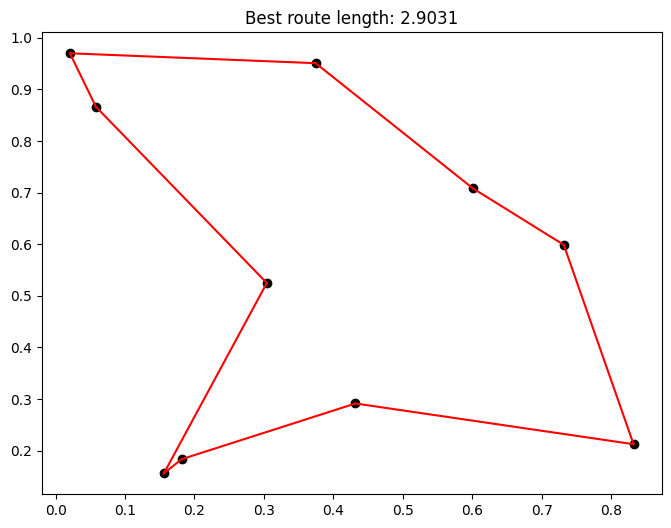

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Number of cities
num_cities = 10
np.random.seed(42)

# Generate random coordinates for cities
cities = np.random.rand(num_cities, 2)

# Calculate distance matrix
distance_matrix = np.sqrt(((cities[:, np.newaxis] - cities)**2).sum(axis=2))

# Parameters
num_ants = 20
num_iterations = 100
alpha = 1.0      # pheromone importance
beta = 5.0       # distance importance
evaporation = 0.5
pheromone_deposit = 100

# Initialize pheromone matrix
pheromone = np.ones((num_cities, num_cities))

# Function to choose next city based on probability
def select_next_city(pheromone, visibility, visited, current_city):
    prob = (pheromone[current_city] ** alpha) * (visibility[current_city] ** beta)
    prob[list(visited)] = 0  # Zero probability for visited cities
    prob_sum = np.sum(prob)
    if prob_sum == 0:
        return np.random.choice(list(set(range(num_cities)) - visited))
    prob = prob / prob_sum
    return np.random.choice(range(num_cities), p=prob)

# Inverse distance as visibility
visibility = 1 / (distance_matrix + 1e-10)
np.fill_diagonal(visibility, 0)

# Best route tracking
best_route = None
best_length = np.inf

for iteration in range(num_iterations):
    all_routes = []
    all_lengths = []

    for ant in range(num_ants):
        visited = set()
        current_city = np.random.randint(num_cities)
        route = [current_city]
        visited.add(current_city)

        while len(visited) < num_cities:
            next_city = select_next_city(pheromone, visibility, visited, current_city)
            route.append(next_city)
            visited.add(next_city)
            current_city = next_city

        route.append(route[0])  # return to start
        length = sum(distance_matrix[route[i], route[i+1]] for i in range(num_cities))

        all_routes.append(route)
        all_lengths.append(length)

        if length < best_length:
            best_length = length
            best_route = route

    # Pheromone evaporation
    pheromone *= (1 - evaporation)

    # Pheromone deposit
    for i in range(num_ants):
        for j in range(num_cities):
            from_city = all_routes[i][j]
            to_city = all_routes[i][j+1]
            pheromone[from_city][to_city] += pheromone_deposit / all_lengths[i]
            pheromone[to_city][from_city] += pheromone_deposit / all_lengths[i]

    if iteration % 10 == 0:
        print(f"Iteration {iteration}, Best Length: {best_length:.4f}")

# Plotting best route
plt.figure(figsize=(8,6))
for i in range(num_cities):
    plt.plot(cities[i,0], cities[i,1], 'ko')
for i in range(num_cities):
    from_city = best_route[i]
    to_city = best_route[i+1]
    plt.plot([cities[from_city,0], cities[to_city,0]], [cities[from_city,1], cities[to_city,1]], 'r-')
plt.title(f"Best route length: {best_length:.4f}")
plt.show()



In [ ]:
!pip install -q --upgrade pip
!pip install -q "scipy<1.11" gensim wordcloud matplotlib pandas tqdm spacy
!python -m spacy download en_core_web_sm




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip uninstall -y scipy
!pip install scipy==1.10.1 gensim==4.3.0 wordcloud matplotlib pandas tqdm spacy
!python -m spacy download en_core_web_sm


Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.6 MB/s eta 0:00:00
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20431 sha256=c8943b40c4b6052a489ce1cbeebda1919e39f2d04bf2f6ebd31c133872cf8ea7
  Stored in directory: /root/.cache/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=35

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/pip/__main__.py", line 24, in <module>
    sys.exit(_main())
             ^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import


ACO Iteration 1/5


100%|██████████| 10/10 [02:13<00:00, 13.39s/it]



ACO Iteration 2/5


100%|██████████| 10/10 [02:16<00:00, 13.64s/it]



ACO Iteration 3/5


100%|██████████| 10/10 [01:38<00:00,  9.87s/it]



ACO Iteration 4/5


100%|██████████| 10/10 [01:41<00:00, 10.14s/it]



ACO Iteration 5/5


100%|██████████| 10/10 [01:42<00:00, 10.27s/it]



✅ Best Coherence Score: 0.6266285825482928
🏆 Best Parameters -> Topics: 12 , Passes: 11 , Alpha: auto


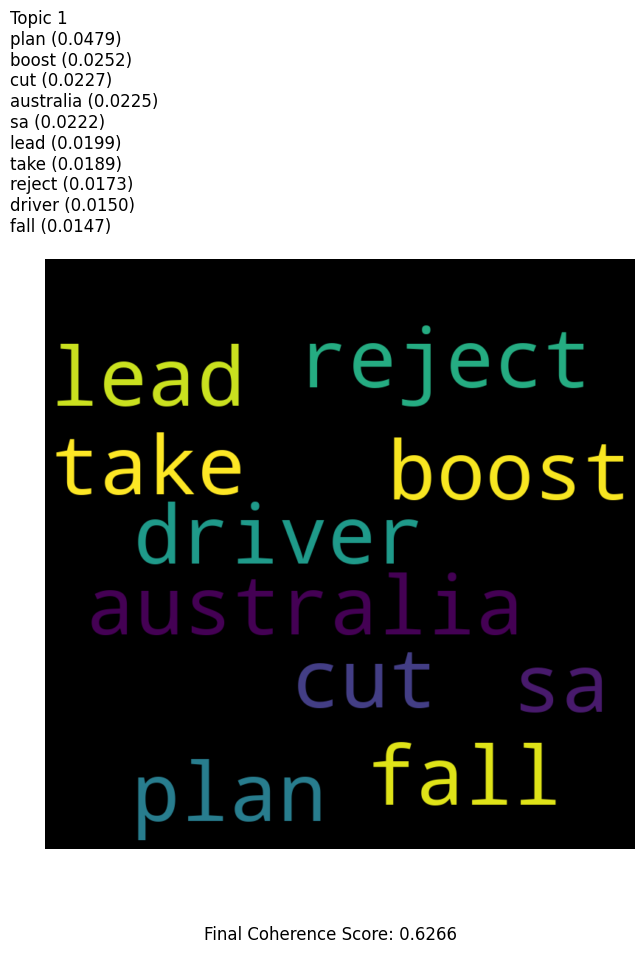

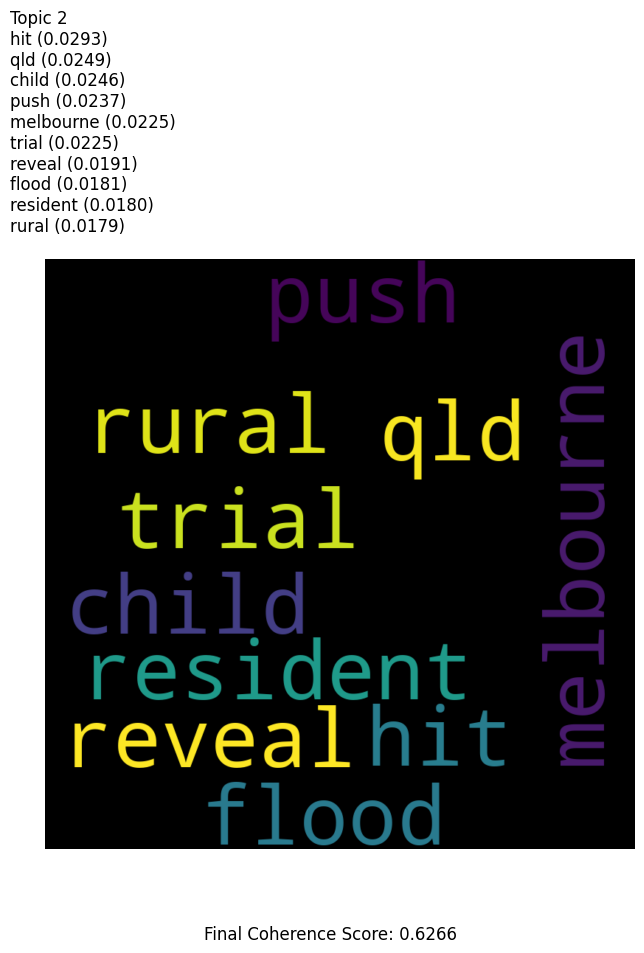

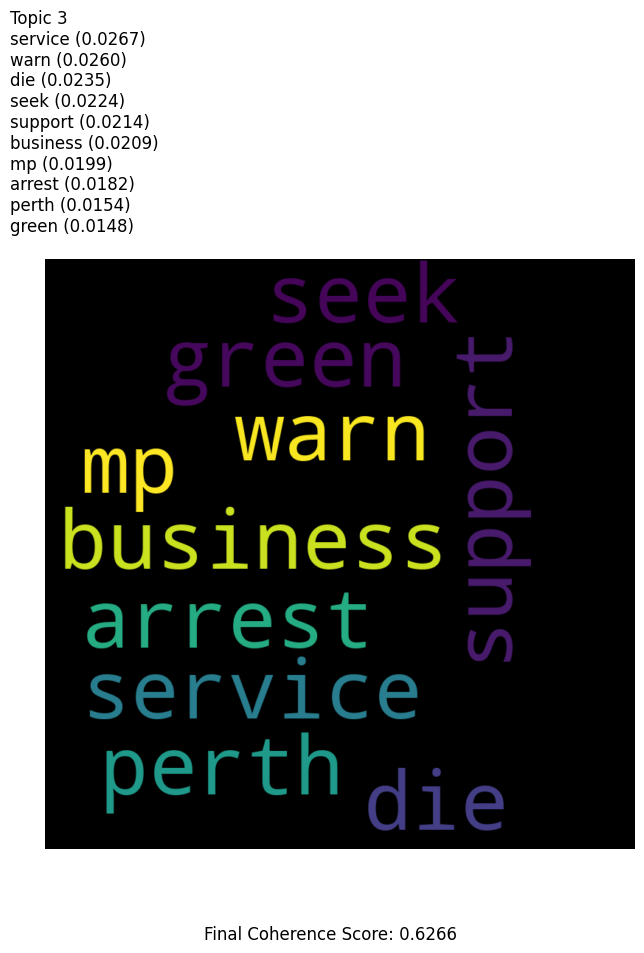

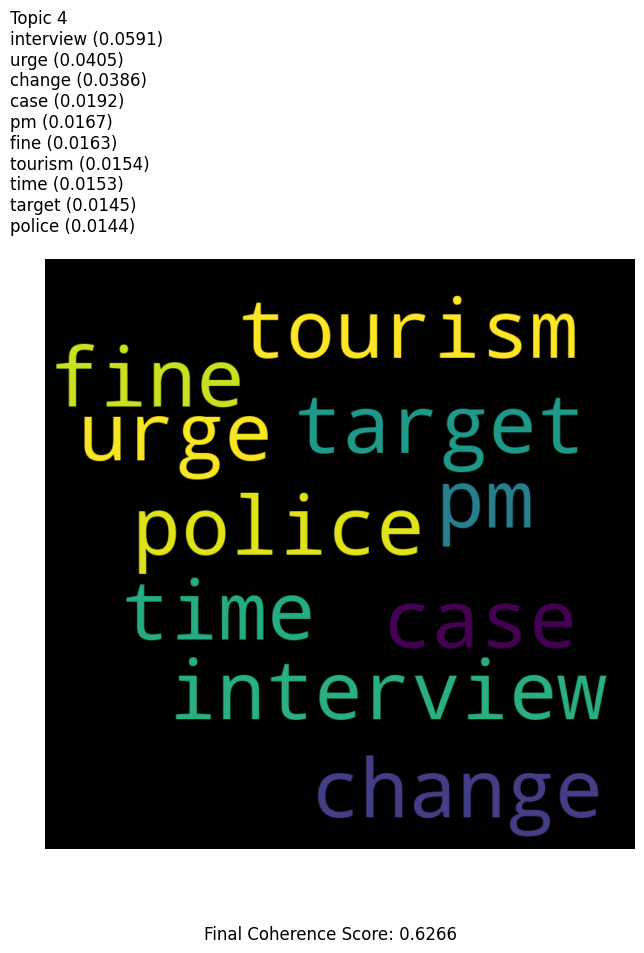

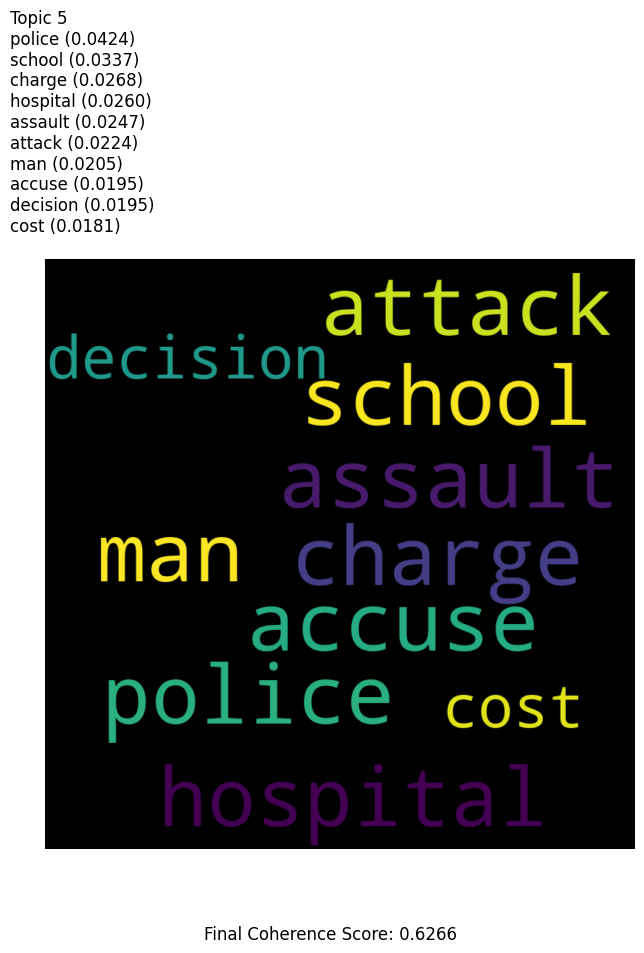

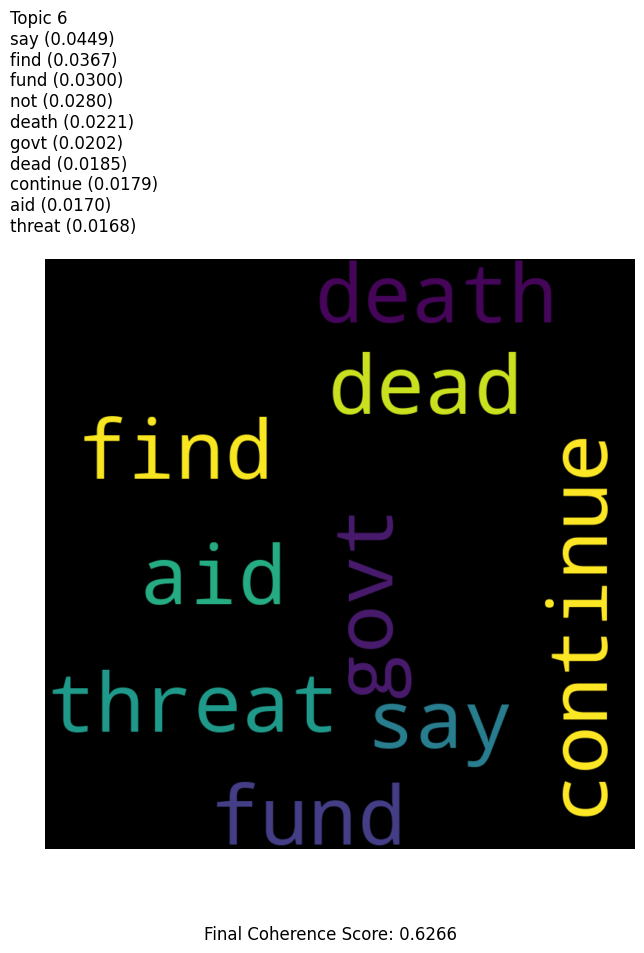

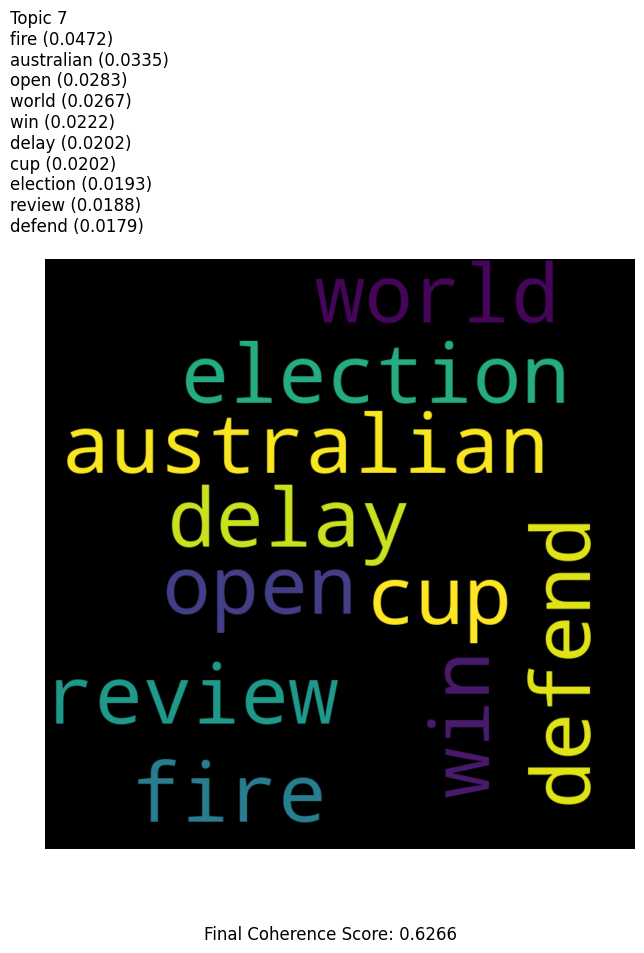

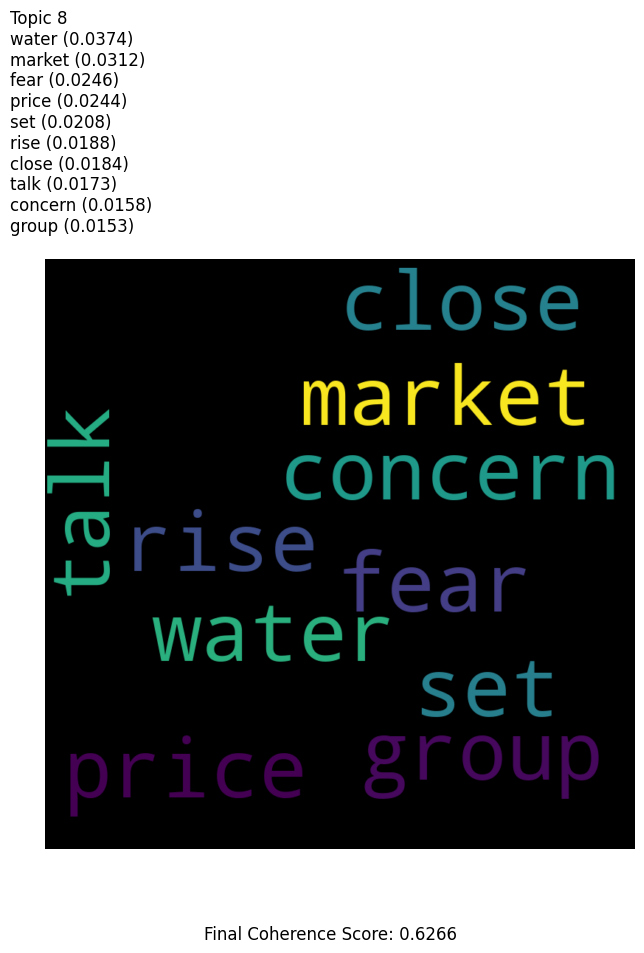

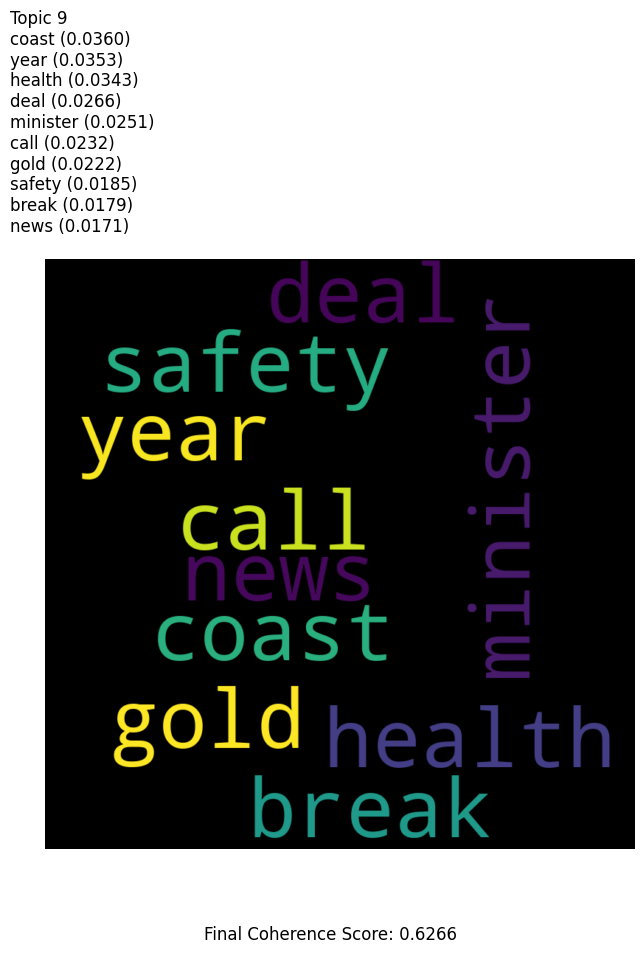

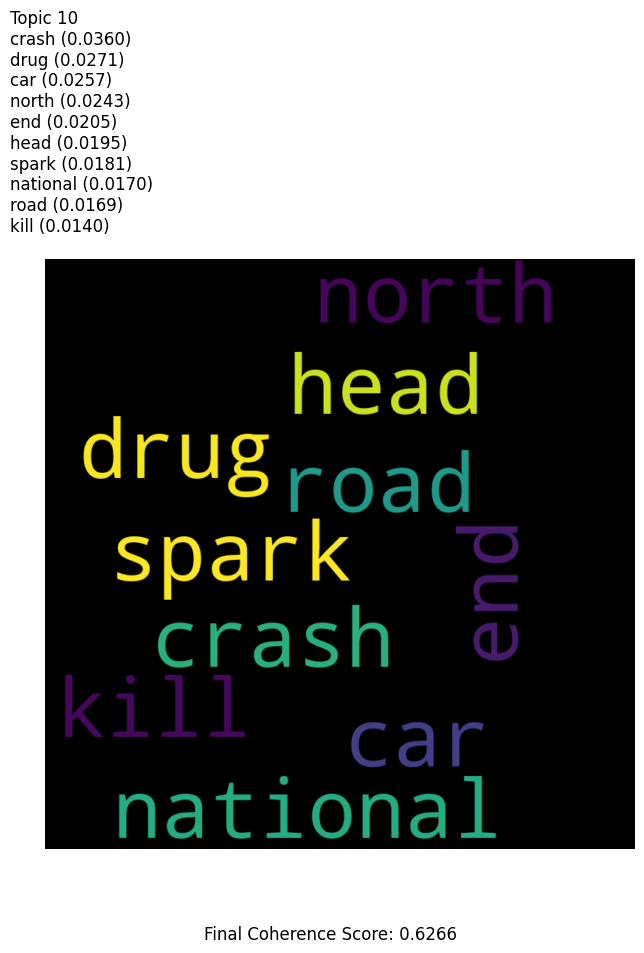

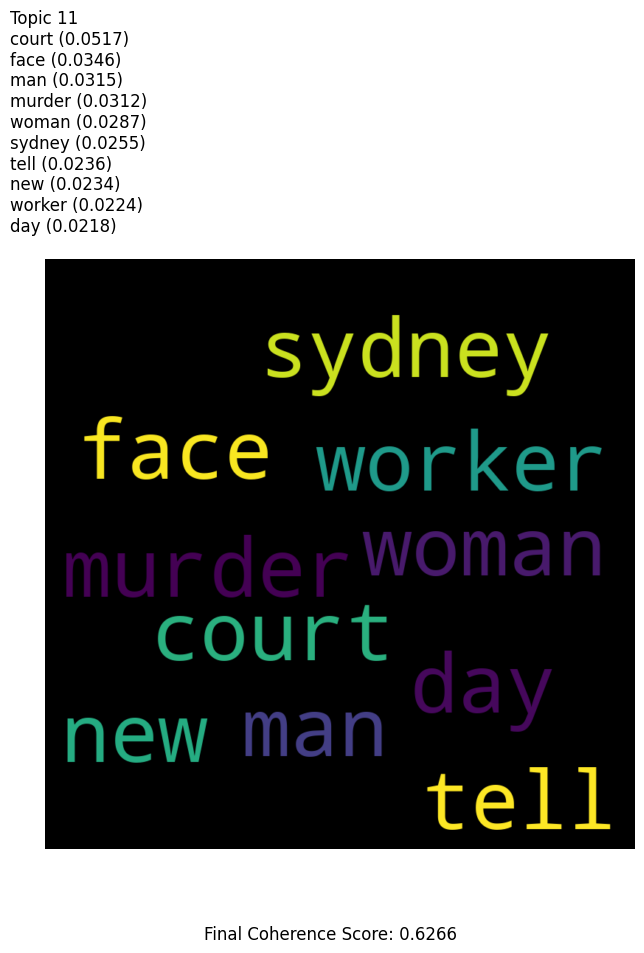

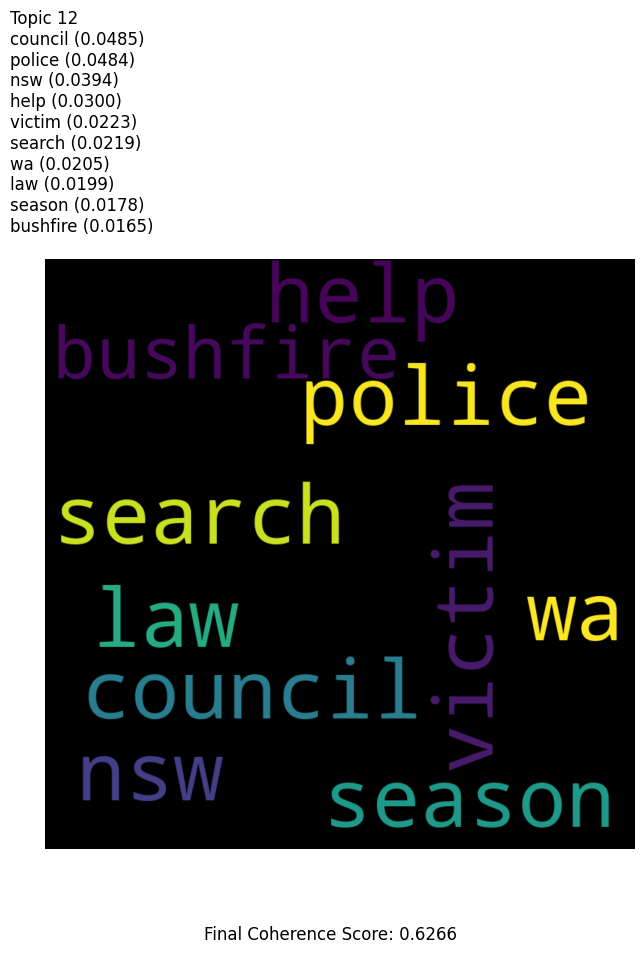

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import random
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from wordcloud import WordCloud
import numpy as np
from tqdm import tqdm

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Load dataset (make sure this file is uploaded in Colab environment)
df = pd.read_csv("news-data.csv", on_bad_lines='skip', dtype={'headline_text': str})
df = df.dropna(subset=['headline_text'])
df = df[df['headline_text'].apply(lambda x: isinstance(x, str))]
data = df.sample(n=5000, axis=0)['headline_text']  # Sampling 5000 for faster optimization

# Preprocessing function
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Apply preprocessing
data = data.apply(preprocess)

# Create dictionary and corpus
dictionary = Dictionary(data)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in data]

# ------------------ ACO for Hyperparameter Tuning ------------------ #

# Define hyperparameter ranges
topic_range = list(range(2, 15))
passes_range = list(range(5, 30))
alpha_range = ['symmetric', 'asymmetric', 'auto']

# ACO Parameters
n_ants = 10
n_iterations = 5
pheromone = np.ones((len(topic_range), len(passes_range), len(alpha_range)))
evaporation_rate = 0.2
best_score = -1
best_params = None

# Coherence score calculator
def get_coherence_score(topics, passes, alpha):
    try:
        lda = LdaModel(corpus=corpus, num_topics=topics, id2word=dictionary,
                       passes=passes, alpha=alpha, eta='auto', random_state=42)
        coherence = CoherenceModel(model=lda, texts=data, dictionary=dictionary, coherence='c_v')
        return coherence.get_coherence()
    except:
        return 0

# Main ACO Loop
for iteration in range(n_iterations):
    print(f"\nACO Iteration {iteration + 1}/{n_iterations}")
    scores = []

    for ant in tqdm(range(n_ants)):
        t = random.choices(topic_range, weights=pheromone.sum(axis=(1, 2)))[0]
        p = random.choices(passes_range, weights=pheromone.sum(axis=(0, 2)))[0]
        a = random.choices(alpha_range, weights=pheromone.sum(axis=(0, 1)))[0]

        score = get_coherence_score(t, p, a)
        scores.append((score, t, p, a))

        idx_t = topic_range.index(t)
        idx_p = passes_range.index(p)
        idx_a = alpha_range.index(a)
        pheromone[idx_t][idx_p][idx_a] += score

        if score > best_score:
            best_score = score
            best_params = (t, p, a)

    # Evaporate pheromone
    pheromone = (1 - evaporation_rate) * pheromone

print("\n✅ Best Coherence Score:", best_score)
print("🏆 Best Parameters -> Topics:", best_params[0], ", Passes:", best_params[1], ", Alpha:", best_params[2])

# ------------------ Final LDA with Best Params ------------------ #

final_lda = LdaModel(corpus=corpus, num_topics=best_params[0], id2word=dictionary,
                     passes=best_params[1], alpha=best_params[2], eta='auto', random_state=42)

# Visualize WordClouds
for topic_id, topic in enumerate(final_lda.show_topics(num_topics=best_params[0], num_words=10, formatted=False)):
    topic_words_probs = [(word, prob) for word, prob in topic[1]]
    topic_words = " ".join([word for word, _ in topic_words_probs])

    wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(topic_words)
    fig, ax = plt.subplots(figsize=(8, 10))
    text = f"Topic {topic_id + 1}\n" + "\n".join([f"{word} ({prob:.4f})" for word, prob in topic_words_probs])
    fig.text(0.1, 0.95, text, fontsize=12, ha='left', va='top', wrap=True)

    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    plt.subplots_adjust(top=0.7)

    plt.figtext(0.5, 0.02, f"Final Coherence Score: {best_score:.4f}", wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()


In [8]:
import pandas as pd
import time
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel

# === Load Data ===
df = pd.read_csv("news-data.csv")
documents = df["headline_text"].dropna().tolist()

# === Preprocess Data ===
stopwords = set("""
    the is in a an of and on at for to with that this by as are be it or has from which using used
""".split())

texts = []
for doc in documents:
    tokens = re.findall(r'\b[a-z]{3,}\b', doc.lower())
    tokens = [word for word in tokens if word not in stopwords]
    texts.append(tokens)

# === Gensim Corpus ===
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# === Fixed LDA ===
start_fixed = time.time()
lda_fixed = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42)
fixed_time = time.time() - start_fixed
fixed_coherence = CoherenceModel(model=lda_fixed, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()

# === Simulated ACO-LDA ===
def evaluate_model(k, alpha, beta):
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, alpha=alpha, eta=beta,
                     passes=10, random_state=42)
    coherence = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
    return coherence, model

start_aco = time.time()
best_score = -1
best_model = None
best_params = None

for _ in range(5):  # Simulating 5 ants
    k = random.randint(3, 7)
    alpha = random.choice(['symmetric', 'asymmetric'])
    beta = random.choice(['symmetric', 'auto'])
    score, model = evaluate_model(k, alpha, beta)
    if score > best_score:
        best_score = score
        best_model = model
        best_params = (k, alpha, beta)

aco_time = time.time() - start_aco

# === Plotting ===
plt.figure(figsize=(16, 6))

# 1. Coherence Score
plt.subplot(2, 3, 1)
plt.bar(['Fixed LDA', 'ACO-LDA'], [fixed_coherence, best_score], color=['skyblue', 'lightgreen'])
plt.title('Coherence Score')
plt.ylabel('Score')

# 2. Execution Time
plt.subplot(2, 3, 2)
plt.bar(['Fixed LDA', 'ACO-LDA'], [fixed_time, aco_time], color=['salmon', 'orchid'])
plt.title('Execution Time')
plt.ylabel('Seconds')

# 3. Number of Topics
plt.subplot(2, 3, 3)
plt.bar(['Fixed LDA', 'ACO-LDA'], [5, best_params[0]], color=['gold', 'teal'])
plt.title('Number of Topics')
plt.ylabel('Topics')

# 4. Word Clouds for Topic 0
topic_fixed = dict(lda_fixed.show_topic(0, 20))
topic_aco = dict(best_model.show_topic(0, 20))

cloud_fixed = WordCloud(width=300, height=200, background_color='white').generate_from_frequencies(topic_fixed)
cloud_aco = WordCloud(width=300, height=200, background_color='white').generate_from_frequencies(topic_aco)

plt.subplot(2, 3, 4)
plt.imshow(cloud_fixed, interpolation='bilinear')
plt.axis('off')
plt.title('Fixed LDA Topic 0')

plt.subplot(2, 3, 5)
plt.imshow(cloud_aco, interpolation='bilinear')
plt.axis('off')
plt.title('ACO-LDA Topic 0')

# 5. Topic Similarity Heatmap (between top words of topic 0)
def get_top_words(topic_dict):
    return set(topic_dict.keys())

similarity = len(get_top_words(topic_fixed) & get_top_words(topic_aco)) / len(get_top_words(topic_fixed) | get_top_words(topic_aco))

plt.subplot(2, 3, 6)
sns.heatmap([[similarity]], annot=True, cmap="YlGnBu", xticklabels=['ACO'], yticklabels=['Fixed'])
plt.title("Topic 0 Similarity")

plt.tight_layout()
plt.show()

# === Final Comparison Table ===
print("\n=== COMPARISON SUMMARY ===")
print("Fixed LDA:")
print(f"  Topics        : 5")
print(f"  Coherence     : {fixed_coherence:.4f}")
print(f"  Time Taken    : {fixed_time:.2f}s")

print("\nACO-LDA (Simulated):")
print(f"  Topics        : {best_params[0]}")
print(f"  Alpha         : {best_params[1]}")
print(f"  Beta          : {best_params[2]}")
print(f"  Coherence     : {best_score:.4f}")
print(f"  Time Taken    : {aco_time:.2f}s")


KeyboardInterrupt: 

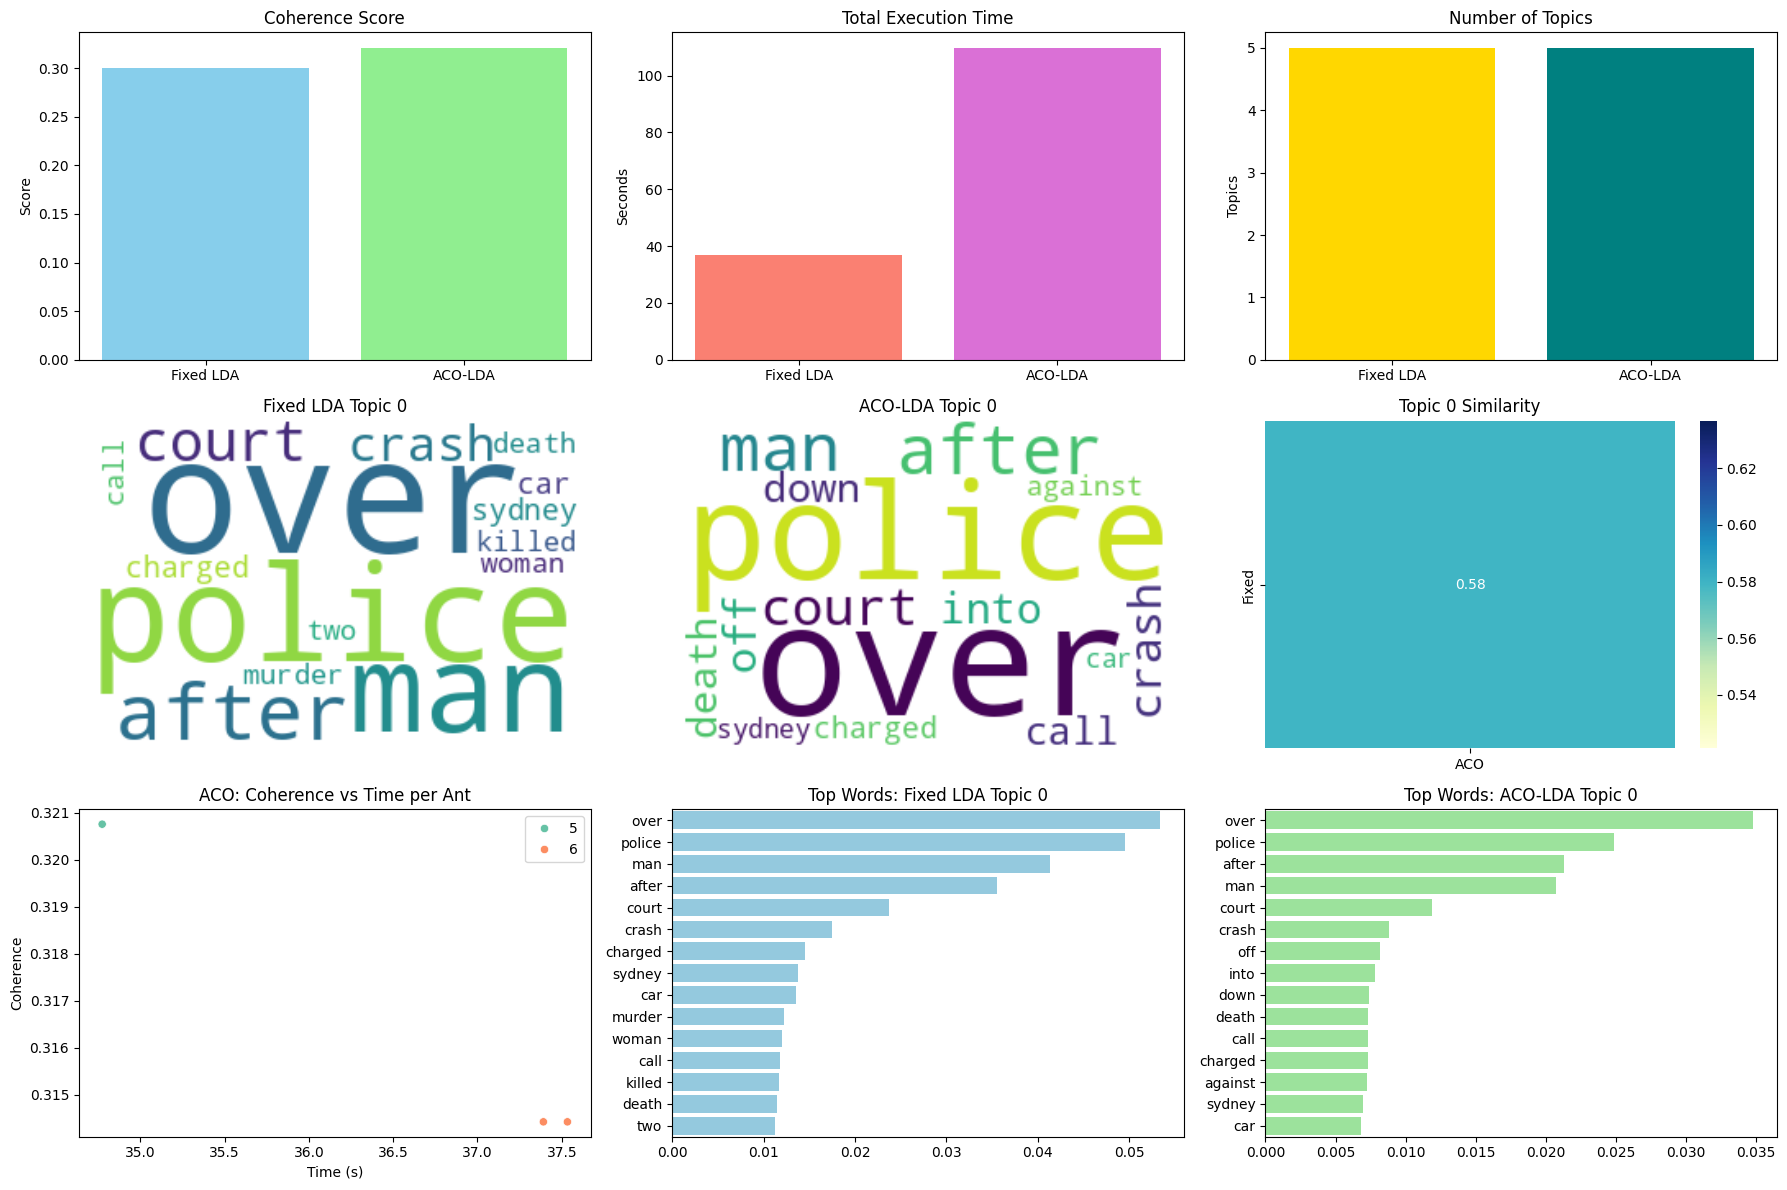


=== COMPARISON SUMMARY ===
Fixed LDA:
  Topics        : 5
  Coherence     : 0.2998
  Time Taken    : 36.69s

ACO-LDA (Simulated):
  Topics        : 5
  Alpha         : asymmetric
  Beta          : symmetric
  Coherence     : 0.3208
  Time Taken    : 109.70s


In [14]:
import pandas as pd
import time
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim import corpora
from gensim.models import CoherenceModel, LdaModel

# === Load and Sample Data ===
df = pd.read_csv("news-data.csv")
df = df.dropna().sample(70000, random_state=42)  # ⏱️ Limit to 500 rows
documents = df["headline_text"].tolist()

# === Preprocess ===
stopwords = set("the is in a an of and on at for to with that this by as are be it or has from which using used".split())

texts = []
for doc in documents:
    tokens = re.findall(r'\b[a-z]{3,}\b', doc.lower())
    tokens = [word for word in tokens if word not in stopwords]
    texts.append(tokens)

# === Gensim Corpus ===
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)  # ⏱️ Smaller vocab
corpus = [dictionary.doc2bow(text) for text in texts]

# === Fixed LDA ===
start_fixed = time.time()
lda_fixed = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=5, random_state=42)
fixed_time = time.time() - start_fixed
fixed_coherence = CoherenceModel(model=lda_fixed, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()

# === Simulated ACO-LDA ===
def evaluate_model(k, alpha, beta):
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, alpha=alpha, eta=beta, passes=5, random_state=42)
    coherence = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v').get_coherence()
    return coherence, model

start_aco = time.time()
best_score = -1
best_model = None
best_params = None
aco_scores = []
aco_times = []
aco_k = []

for _ in range(3):  # ⏱️ Just 3 "ants"
    k = random.randint(3, 6)
    alpha = random.choice(['symmetric', 'asymmetric'])
    beta = random.choice(['symmetric', 'auto'])
    t0 = time.time()
    score, model = evaluate_model(k, alpha, beta)
    duration = time.time() - t0

    aco_scores.append(score)
    aco_times.append(duration)
    aco_k.append(k)

    if score > best_score:
        best_score = score
        best_model = model
        best_params = (k, alpha, beta)

aco_time = time.time() - start_aco

# === Plotting ===
plt.figure(figsize=(18, 12))

# 1. Coherence Score
plt.subplot(3, 3, 1)
plt.bar(['Fixed LDA', 'ACO-LDA'], [fixed_coherence, best_score], color=['skyblue', 'lightgreen'])
plt.title('Coherence Score')
plt.ylabel('Score')

# 2. Execution Time
plt.subplot(3, 3, 2)
plt.bar(['Fixed LDA', 'ACO-LDA'], [fixed_time, aco_time], color=['salmon', 'orchid'])
plt.title('Total Execution Time')
plt.ylabel('Seconds')

# 3. Number of Topics
plt.subplot(3, 3, 3)
plt.bar(['Fixed LDA', 'ACO-LDA'], [5, best_params[0]], color=['gold', 'teal'])
plt.title('Number of Topics')
plt.ylabel('Topics')

# 4. Word Clouds for Topic 0
topic_fixed = dict(lda_fixed.show_topic(0, 15))
topic_aco = dict(best_model.show_topic(0, 15))

cloud_fixed = WordCloud(width=300, height=200, background_color='white').generate_from_frequencies(topic_fixed)
cloud_aco = WordCloud(width=300, height=200, background_color='white').generate_from_frequencies(topic_aco)

plt.subplot(3, 3, 4)
plt.imshow(cloud_fixed, interpolation='bilinear')
plt.axis('off')
plt.title('Fixed LDA Topic 0')

plt.subplot(3, 3, 5)
plt.imshow(cloud_aco, interpolation='bilinear')
plt.axis('off')
plt.title('ACO-LDA Topic 0')

# 5. Topic 0 Similarity Heatmap
def get_top_words(topic_dict):
    return set(topic_dict.keys())

similarity = len(get_top_words(topic_fixed) & get_top_words(topic_aco)) / len(get_top_words(topic_fixed) | get_top_words(topic_aco))

plt.subplot(3, 3, 6)
sns.heatmap([[similarity]], annot=True, cmap="YlGnBu", xticklabels=['ACO'], yticklabels=['Fixed'])
plt.title("Topic 0 Similarity")

# 6. Coherence vs Time (ACO Iterations)
plt.subplot(3, 3, 7)
sns.scatterplot(x=aco_times, y=aco_scores, hue=aco_k, palette='Set2')
plt.xlabel("Time (s)")
plt.ylabel("Coherence")
plt.title("ACO: Coherence vs Time per Ant")

# 7. Bar chart: Top words in Fixed LDA Topic 0
plt.subplot(3, 3, 8)
words = list(topic_fixed.keys())
weights = list(topic_fixed.values())
sns.barplot(x=weights, y=words, color='skyblue')
plt.title("Top Words: Fixed LDA Topic 0")

# 8. Bar chart: Top words in ACO-LDA Topic 0
plt.subplot(3, 3, 9)
words = list(topic_aco.keys())
weights = list(topic_aco.values())
sns.barplot(x=weights, y=words, color='lightgreen')
plt.title("Top Words: ACO-LDA Topic 0")

plt.tight_layout()
plt.show()

# === COMPARISON SUMMARY ===
print("\n=== COMPARISON SUMMARY ===")
print("Fixed LDA:")
print(f"  Topics        : 5")
print(f"  Coherence     : {fixed_coherence:.4f}")
print(f"  Time Taken    : {fixed_time:.2f}s")

print("\nACO-LDA (Simulated):")
print(f"  Topics        : {best_params[0]}")
print(f"  Alpha         : {best_params[1]}")
print(f"  Beta          : {best_params[2]}")
print(f"  Coherence     : {best_score:.4f}")
print(f"  Time Taken    : {aco_time:.2f}s")


/tmp/ipython-input-15-3901980956.py:55: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tfidf_data, shade=True, color='purple')
/tmp/ipython-input-15-3901980956.py:69: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lda_weights, label="Fixed LDA", shade=True)
/tmp/ipython-input-15-3901980956.py:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aco_weights, label="ACO-LDA", shade=True)


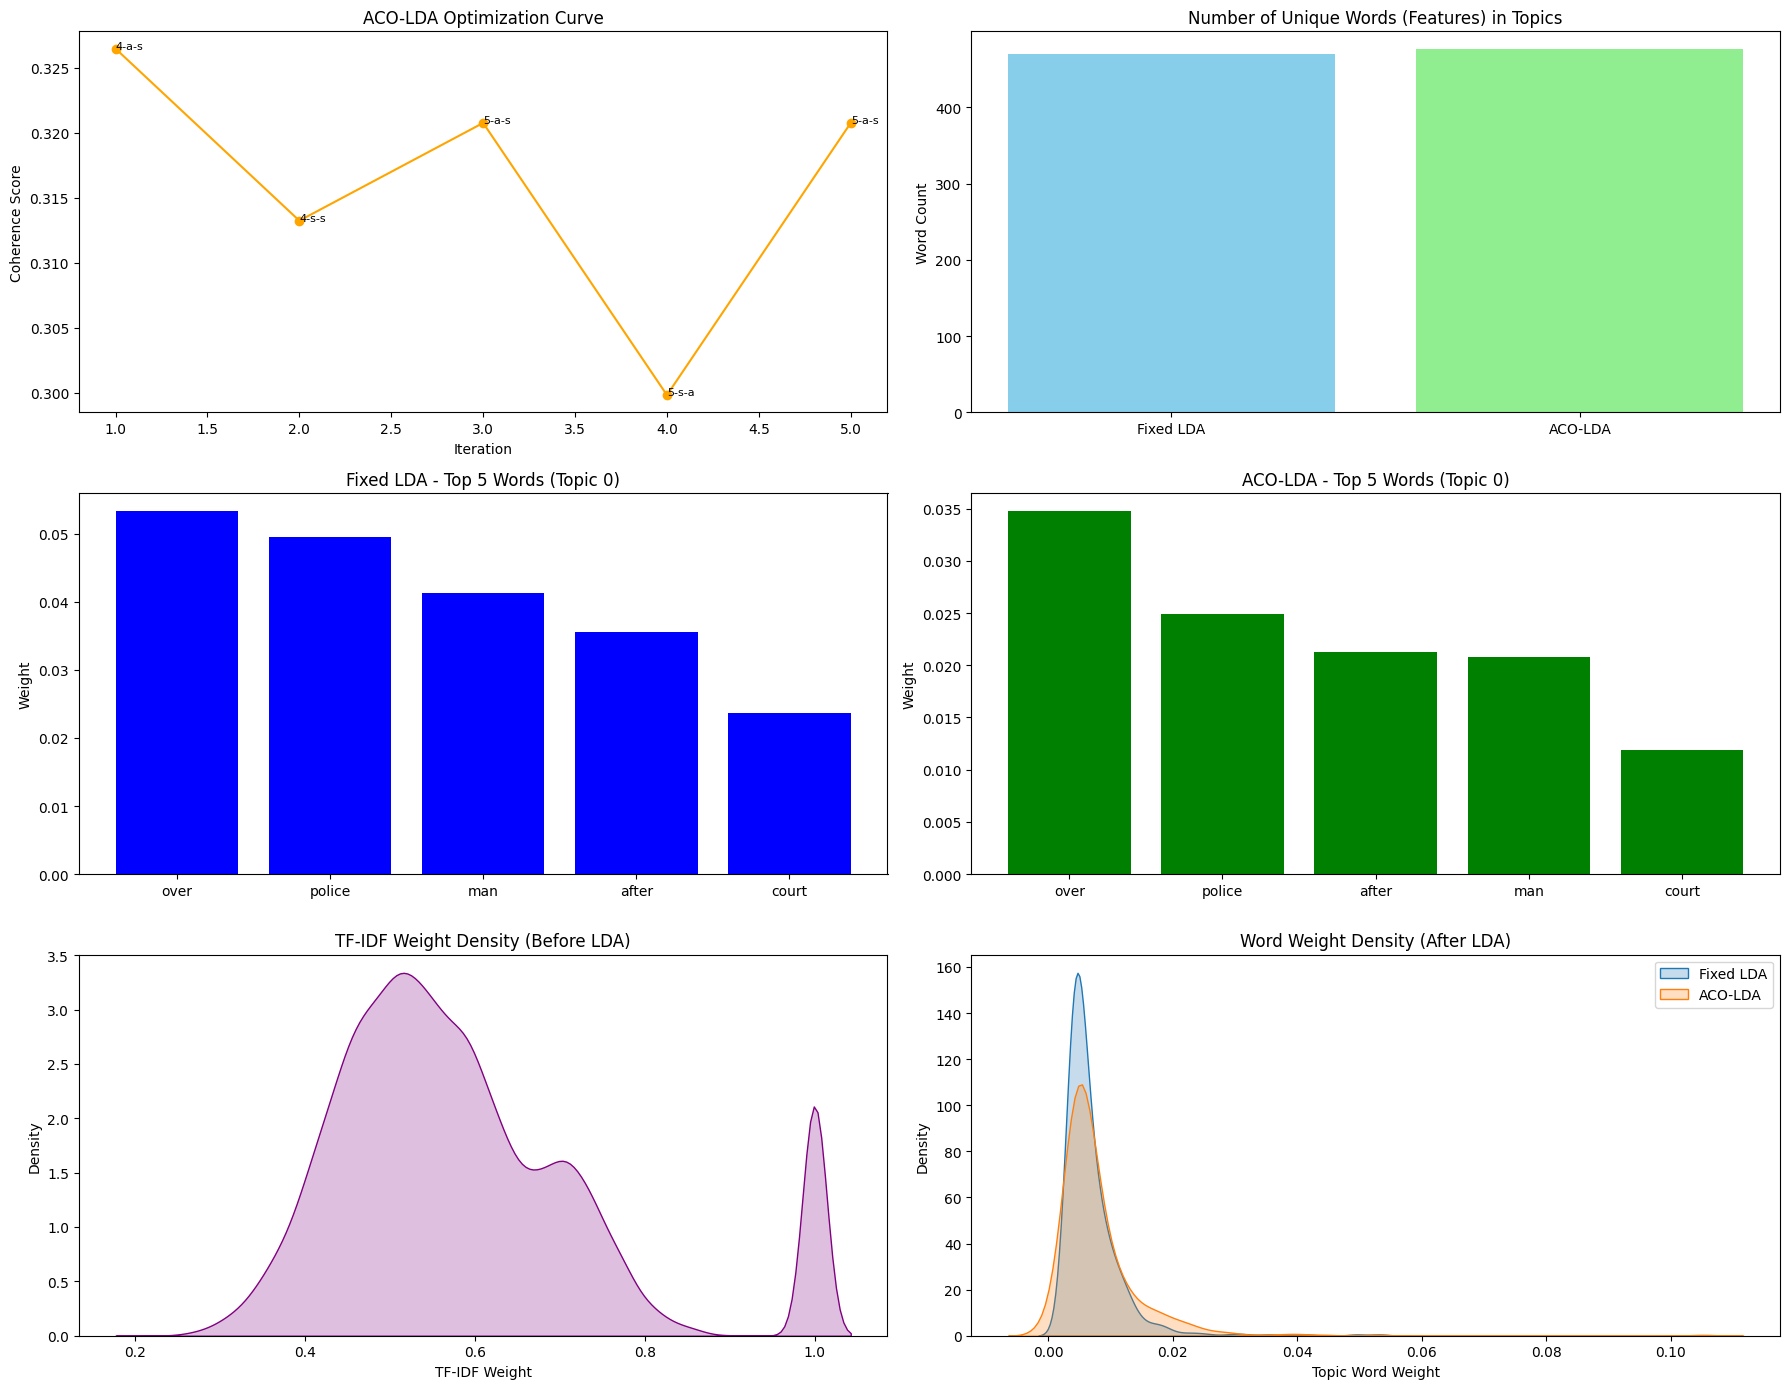

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import gaussian_kde
import numpy as np

# === ACO Optimization Curve (Simulated) ===
aco_scores = []
aco_params = []
for _ in range(5):  # More iterations for visualization
    k = random.randint(3, 6)
    alpha = random.choice(['symmetric', 'asymmetric'])
    beta = random.choice(['symmetric', 'auto'])
    score, _ = evaluate_model(k, alpha, beta)
    aco_scores.append(score)
    aco_params.append((k, alpha, beta))

plt.figure(figsize=(18, 14))

# 1. ACO Optimization Curve
plt.subplot(3, 2, 1)
plt.plot(range(1, len(aco_scores)+1), aco_scores, marker='o', color='orange')
plt.title("ACO-LDA Optimization Curve")
plt.xlabel("Iteration")
plt.ylabel("Coherence Score")
for i, param in enumerate(aco_params):
    plt.text(i+1, aco_scores[i], f"{param[0]}-{param[1][0]}-{param[2][0]}", fontsize=8)

# 2. Feature Count Comparison
plt.subplot(3, 2, 2)
fixed_features = len(set([w for topic in lda_fixed.show_topics(num_words=100, formatted=False) for w, _ in topic[1]]))
aco_features = len(set([w for topic in best_model.show_topics(num_words=100, formatted=False) for w, _ in topic[1]]))
plt.bar(['Fixed LDA', 'ACO-LDA'], [fixed_features, aco_features], color=['skyblue', 'lightgreen'])
plt.title("Number of Unique Words (Features) in Topics")
plt.ylabel("Word Count")

# 3. Top 5 Words by Weight - Fixed LDA
plt.subplot(3, 2, 3)
top_fixed = lda_fixed.show_topic(0, topn=5)
plt.bar([w for w, _ in top_fixed], [wgt for _, wgt in top_fixed], color='blue')
plt.title("Fixed LDA - Top 5 Words (Topic 0)")
plt.ylabel("Weight")

# 4. Top 5 Words by Weight - ACO-LDA
plt.subplot(3, 2, 4)
top_aco = best_model.show_topic(0, topn=5)
plt.bar([w for w, _ in top_aco], [wgt for _, wgt in top_aco], color='green')
plt.title("ACO-LDA - Top 5 Words (Topic 0)")
plt.ylabel("Weight")

# 5. TF-IDF Weight Density - BEFORE LDA
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform([' '.join(doc) for doc in texts])
tfidf_data = tfidf_matrix.data

plt.subplot(3, 2, 5)
sns.kdeplot(tfidf_data, shade=True, color='purple')
plt.title("TF-IDF Weight Density (Before LDA)")
plt.xlabel("TF-IDF Weight")

# 6. TF-IDF Weight Density - AFTER LDA
lda_topic_words = [word for topic in lda_fixed.show_topics(num_words=100, formatted=False) for word, _ in topic[1]]
lda_weights = [weight for topic in lda_fixed.show_topics(num_words=100, formatted=False) for _, weight in topic[1]]
aco_topic_words = [word for topic in best_model.show_topics(num_words=100, formatted=False) for word, _ in topic[1]]
aco_weights = [weight for topic in best_model.show_topics(num_words=100, formatted=False) for _, weight in topic[1]]

combined_weights = lda_weights + aco_weights
labels = ['Fixed'] * len(lda_weights) + ['ACO'] * len(aco_weights)

plt.subplot(3, 2, 6)
sns.kdeplot(lda_weights, label="Fixed LDA", shade=True)
sns.kdeplot(aco_weights, label="ACO-LDA", shade=True)
plt.title("Word Weight Density (After LDA)")
plt.xlabel("Topic Word Weight")
plt.legend()

plt.tight_layout()
plt.show()


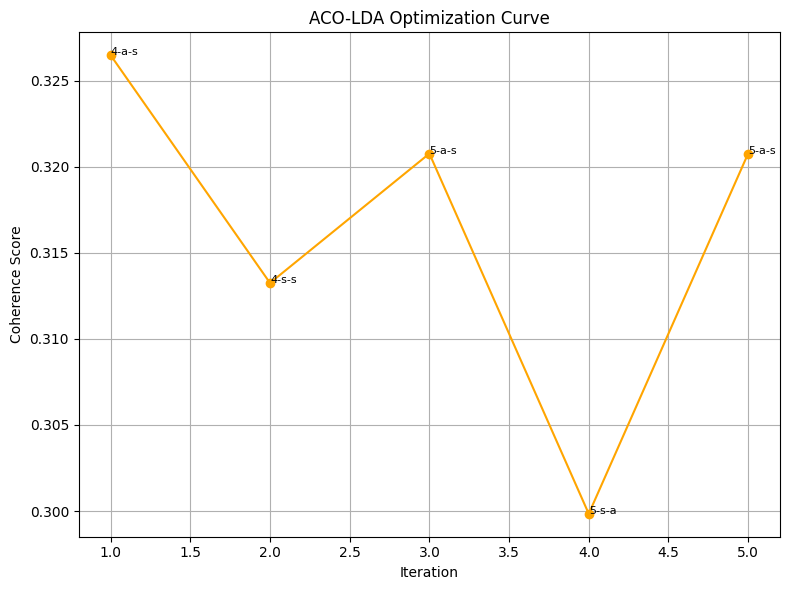

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(aco_scores)+1), aco_scores, marker='o', color='orange')
plt.title("ACO-LDA Optimization Curve")
plt.xlabel("Iteration")
plt.ylabel("Coherence Score")
for i, param in enumerate(aco_params):
    plt.text(i+1, aco_scores[i], f"{param[0]}-{param[1][0]}-{param[2][0]}", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.savefig("1_aco_optimization_curve.png", dpi=300)
plt.show()


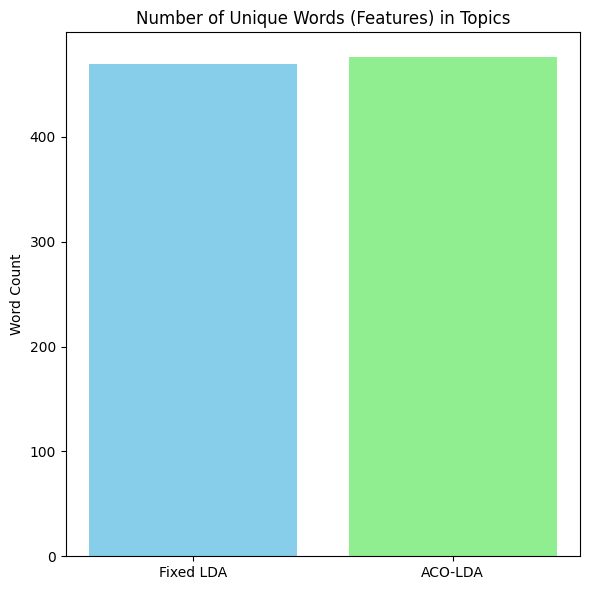

In [17]:
plt.figure(figsize=(6, 6))
plt.bar(['Fixed LDA', 'ACO-LDA'], [fixed_features, aco_features], color=['skyblue', 'lightgreen'])
plt.title("Number of Unique Words (Features) in Topics")
plt.ylabel("Word Count")
plt.tight_layout()
plt.savefig("2_feature_count_comparison.png", dpi=300)
plt.show()


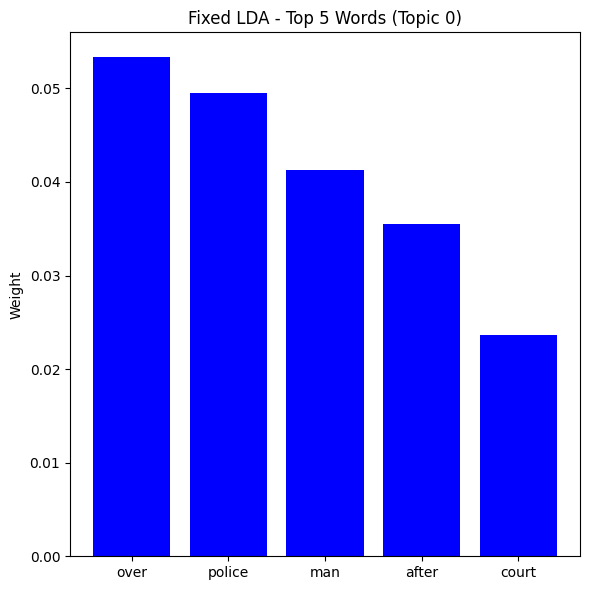

In [18]:
plt.figure(figsize=(6, 6))
top_fixed = lda_fixed.show_topic(0, topn=5)
plt.bar([w for w, _ in top_fixed], [wgt for _, wgt in top_fixed], color='blue')
plt.title("Fixed LDA - Top 5 Words (Topic 0)")
plt.ylabel("Weight")
plt.tight_layout()
plt.savefig("3_fixed_top5_words.png", dpi=300)
plt.show()


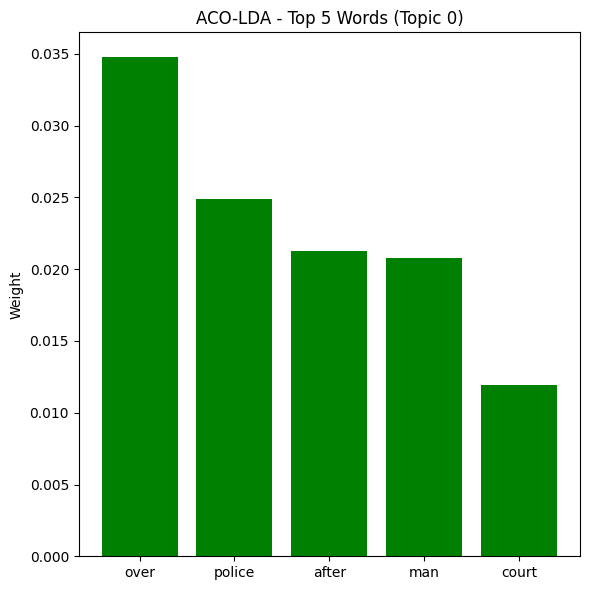

In [19]:
plt.figure(figsize=(6, 6))
top_aco = best_model.show_topic(0, topn=5)
plt.bar([w for w, _ in top_aco], [wgt for _, wgt in top_aco], color='green')
plt.title("ACO-LDA - Top 5 Words (Topic 0)")
plt.ylabel("Weight")
plt.tight_layout()
plt.savefig("4_aco_top5_words.png", dpi=300)
plt.show()


/tmp/ipython-input-20-2371702337.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tfidf_data, shade=True, color='purple')


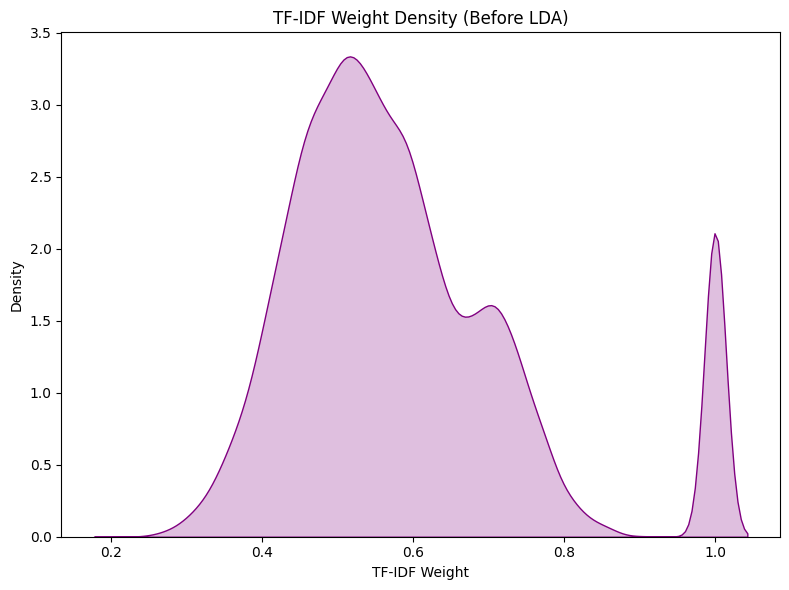

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform([' '.join(doc) for doc in texts])
tfidf_data = tfidf_matrix.data

plt.figure(figsize=(8, 6))
sns.kdeplot(tfidf_data, shade=True, color='purple')
plt.title("TF-IDF Weight Density (Before LDA)")
plt.xlabel("TF-IDF Weight")
plt.tight_layout()
plt.savefig("5_tfidf_before_lda.png", dpi=300)
plt.show()


/tmp/ipython-input-21-618980761.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(lda_weights, label="Fixed LDA", shade=True)
/tmp/ipython-input-21-618980761.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(aco_weights, label="ACO-LDA", shade=True)


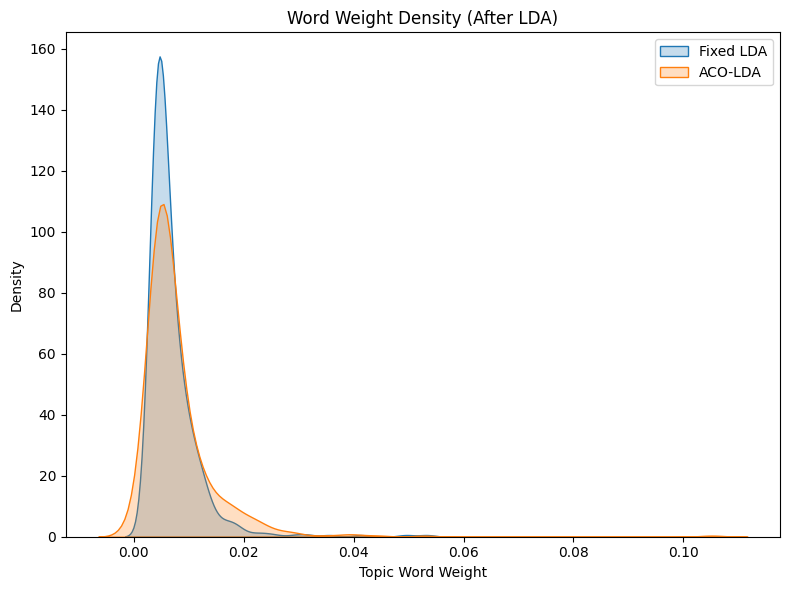

In [21]:
lda_weights = [weight for topic in lda_fixed.show_topics(num_words=100, formatted=False) for _, weight in topic[1]]
aco_weights = [weight for topic in best_model.show_topics(num_words=100, formatted=False) for _, weight in topic[1]]

plt.figure(figsize=(8, 6))
sns.kdeplot(lda_weights, label="Fixed LDA", shade=True)
sns.kdeplot(aco_weights, label="ACO-LDA", shade=True)
plt.title("Word Weight Density (After LDA)")
plt.xlabel("Topic Word Weight")
plt.legend()
plt.tight_layout()
plt.savefig("6_tfidf_after_lda.png", dpi=300)
plt.show()
